In [1]:
from dendrocat import RadioSource
from astropy.io import fits
from spectral_cube import SpectralCube
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
import sys
import importlib
from astropy.wcs import WCS
from scipy import interpolate
import pandas as pd
import sympy as syp
from astropy import units as u
import radio_beam
from astropy.table import Table
from radio_beam import Beam
from astropy import coordinates
from astropy import wcs
from astropy.nddata.utils import Cutout2D
from dendrocat.aperture import Ellipse
from regions import Regions, PixCoord
from astropy import stats
from itertools import chain
from radio_beam import Beams
from astropy.convolution import convolve
import astropy.constants as c

W51 = '/orange/adamginsburg/w51/TaehwaYoo/'
W51b6 = '/orange/adamginsburg/w51/TaehwaYoo/2015.1.01596.S_W51_B6_LB/continuum_images/'
W51cont='/orange/adamginsburg/w51/TaehwaYoo/b6contfits/'
w51e2_b6_briggs=W51cont+'W51e2_cont_bigbriggs.image.fits'
w51e2_b6_robust0=W51cont+'W51e2_cont_big_robust0.image.fits'
w51e2_b6_uniform=W51cont+'W51e2_cont_biguniform.image.fits'
w51e2_b6_superuniform=W51cont+'W51e2_cont_bigsuperuniform.image.fits'

w51n_b6_briggs = W51cont+'W51n_cont_bigbriggs.image.fits'
w51n_b6_robust0 = W51cont+'w51n_cont_big_robust0.image.fits'
w51n_b6_uniform = W51cont+'W51n_cont_biguniform.image.fits'
w51n_b6_superuniform = W51cont+'W51n_cont_bigsuperuniform.image.fits'
w51n_b6_natural = W51cont+'W51n_cont_bignatural.image.fits'

W51b3 = '/orange/adamginsburg/w51/TaehwaYoo/2017.1.00293.S_W51_B3_LB/may2021_successful_imaging/'

w51n_b3_tt0 = W51b3+'w51n.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.image.tt0.pbcor.fits'
w51n_b3_tt1 = W51+'w51n.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.image.tt1.pbcor.fits'
w51n_b3_alpha = W51+'w51n.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.alpha.pbcor.fits'

w51conv = '/orange/adamginsburg/w51/TaehwaYoo/convolved_new/'
w51n_b6_conv = w51conv + 'w51n_cont_bigbriggs.image.convB3_briggs.fits'

w51e_b3_tt0 = W51b3+'w51e2.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.image.tt0.pbcor.fits'
w51e2_b3_tt1 = W51+'w51e2.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.image.tt1.pbcor.fits'
w51e2_b3_alpha = W51+'w51e2.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.alpha.pbcor.fits'

w51e2_b6_conv = w51conv + 'w51e2_cont_bigbriggs.image.convB3_briggs.fits'

w51e_b6_almaimf_conv = '/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/w51e_B6_conv.fits'
w51e_b3_almaimf_conv = '/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/w51e_B3_conv.fits'


w51n_b3_almaimf_conv = '/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/w51n_B3_conv.fits'

w51n_b6_almaimf = '/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/W51-IRS2_B6_uid___A001_X1296_X187_continuum_merged_12M_robust0_selfcal9_finaliter.image.tt0.pbcor.fits'

w51n_b6_conv = w51conv + 'w51n_new_nocorr_in_area_B6_conv.fits'
#w51n_b3_conv = w51conv + 'w51n_B3_conv.fits'
#w51e_b3_conv = w51conv + 'w51e_B3_conv.fits'
w51e_b6_conv = w51conv + 'w51e_new_nocorr_in_area_B6_conv.fits'


w51e_matched_catalog = '/home/t.yoo/w51/catalogue/dendrogram/dendro_w51e_matched.fits'
w51n_matched_catalog = '/home/t.yoo/w51/catalogue/dendrogram/dendro_w51n_matched.fits'

w51e_b3_noiseregion = '/orange/adamginsburg/w51/TaehwaYoo/w51e_b3_std_sky.reg'
w51e_b6_noiseregion = '/orange/adamginsburg/w51/TaehwaYoo/w51e_b6_std_sky.reg'
w51n_b3_noiseregion = '/orange/adamginsburg/w51/TaehwaYoo/w51n_b3_std_sky.reg'
w51n_b6_noiseregion = '/orange/adamginsburg/w51/TaehwaYoo/w51n_b6_std_sky.reg'
w51e_b6_calibrated_pbcor = '/orange/adamginsburg/w51/TaehwaYoo/w51e2.spw0thru19.14500.robust0.thr0.15mJy.mfs.I.startmod.selfcal7.image.tt0.pbcor.fits'
w51n_b6_calibrated_pbcor = '/orange/adamginsburg/w51/TaehwaYoo/w51n.spw0thru19.14500.robust0.thr0.1mJy.mfs.I.startmod.selfcal7.image.tt0.pbcor.fits'


photometrydir = '/home/t.yoo/w51/catalogue/photometry/'
w51e_b3_flux = photometrydir+'w51e_b3_flux_size.fits'
w51n_b3_flux = photometrydir+'w51n_b3_flux_size.fits'
w51e_b6_flux = photometrydir+'w51e_b6_flux_size.fits'
w51n_b6_flux = photometrydir+'w51n_b6_flux_size.fits'
w51e_b6_conv_flux = photometrydir+'w51e_b6_conv_flux_size.fits'
w51n_b6_conv_flux = photometrydir+'w51n_b6_conv_flux_size.fits'







In [2]:
from astropy.table import Table
import matplotlib as mpl
import emcee
import corner
import scipy.integrate as integrate
from scipy.optimize import minimize

def kappa(nu, nu0=271.1*u.GHz, kappa0=0.0114*u.cm**2*u.g**-1, beta=1.75):
    """
    Compute the opacity $\kappa$ given a reference frequency (or wavelength)
    and a power law governing the opacity as a fuction of frequency:
    $$ \kappa = \kappa_0 \left(\\frac{\\nu}{\\nu_0}\\right)^{\\beta} $$
    The default kappa=0.0114 at 271.1 GHz comes from extrapolating the
    Ossenkopf & Henning 1994 opacities for the thin-ice-mantle, 10^6 year model
    anchored at 1.0 mm with an assumed beta of 1.75.
    Parameters
    ----------
    nu: astropy.Quantity [u.spectral() equivalent]
        The frequency at which to evaluate kappa
    nu0: astropy.Quantity [u.spectral() equivalent]
        The reference frequency at which $\kappa$ is defined
    kappa0: astropy.Quantity [cm^2/g]
        The dust opacity per gram of H2 along the line of sight.  Because of
        the H2 conversion, this factor implicitly includes a dust to gas ratio
        (usually assumed 100)
    beta: float
        The power-law index governing kappa as a function of nu
    """
    return (kappa0*(nu.to(u.GHz,u.spectral())/nu0.to(u.GHz,u.spectral()))**(beta)).to(u.cm**2/u.g)


def BB(freq, temp):
    B_nu = (2 * freq**3 *c.h / (c.c**2) * 1 / (np.e**(c.h*freq/(c.k_B*temp))-1))
    return B_nu
#def find_opt_thick_radius(rarr, kappa, rho):
#    
#    kappa*rho*

def get_flux_aperture(theta, rarr, freqb3, freqb6, dist=5.41*u.kpc, r_0 = 1*u.au, verbose=False ):
    rmax = rarr[-1]
    dr = rarr[1:] - rarr[:-1]
    dr = np.append(dr, rarr[-1])
    T1, T2, logrho_0, alpha = theta
    rho_0 = 10**logrho_0 *u.g / u.cm**3
    #print(rho_0)
    
    rho_r =  rho_0 * (rarr/r_0)**(-alpha)
    
    kappa_b3 = kappa(freqb3)
    kappa_b6 = kappa(freqb6)
    #print('ho',(rho_0*kappa_b3*r_0).to(u.cm/u.cm))

    au_to_cm = (1*u.au).to(u.cm)
    #print((kappa_b3*rho_0*r_0).to(u.au/u.au), alpha)
    r_b3thick = r_0 * (1+(1-alpha)/kappa_b3/rho_0/r_0)**(1/(1-alpha))
    r_b6thick = r_0 * (1+(1-alpha)/kappa_b6/rho_0/r_0)**(1/(1-alpha))

    #r_b3thick = (1-alpha + kappa_b3.value * rho_0.value * r_0.value * au_to_cm.value) / (kappa_b3.value * rho_0.value * (r_0.value * au_to_cm.value)**alpha)**(1/(1-alpha)) / au_to_cm.value
    #r_b6thick = (1-alpha + kappa_b6.value * rho_0.value * r_0.value * au_to_cm.value) / (kappa_b6.value * rho_0.value * (r_0.value * au_to_cm.value)**alpha)**(1/(1-alpha)) / au_to_cm.value
   # print('r_b3thick', r_b3thick)
   # print('r_b6thick', r_b6thick)
    
    BBthick_b3 = BB(freqb3, T1*u.K)
    BBthick_b6 = BB(freqb6, T1*u.K)
    
    BBthin_b3 = BB(freqb3, T2*u.K)
    BBthin_b6 = BB(freqb6, T2*u.K)
    
    flux_b3_arr = []
    flux_b6_arr =  []
    flux_b3 = flux_b6 = 0*u.Jy
    for i,r in enumerate(rarr):
        if verbose:
            print('verbose turned on')
            print(i,r)
        int_uplim = np.sqrt(rmax**2-r**2)
        #int_lolim_b3 = np.max((np.sqrt(r_b3thick.value**2-r**2),np.sqrt(1-r**2)))
        #int_lolim_b6 = np.max((np.sqrt(r_b6thick.value**2-r**2),np.sqrt(1-r**2)))
      
        if r< r_b6thick.value and r_b3thick.value>0 and r_b6thick.value>0:
            if r<1 and 1>r_b3thick.value:
                int_lolim_b3 = np.sqrt(1-r**2)
            else:
                int_lolim_b3 = np.sqrt(r_b3thick.value**2-r**2)
            if r<1 and r>r_b6thick.value:
                int_lolim_b6 = np.sqrt(1-r**2)
            else:
                int_lolim_b6 = np.sqrt(r_b6thick.value**2-r**2)
                
            if any((int_lolim_b3 > int_uplim,int_lolim_b6 > int_uplim)): #completely optically thick
                tau_b3 = 0
                tau_b6 = 0
                I_b3 = BBthick_b3 
                I_b6 = BBthick_b6 
            else:
                tau_b3 = (kappa_b3 * rho_0 * integrate.quad(lambda x: (np.sqrt(r**2+x**2)/r_0.value)**(-alpha), int_lolim_b3, int_uplim) *u.au).to(u.cm/u.cm)[0] 
                tau_b6 = (kappa_b6 * rho_0 * integrate.quad(lambda x: (np.sqrt(r**2+x**2)/r_0.value)**(-alpha), int_lolim_b6, int_uplim) *u.au).to(u.cm/u.cm)[0] 

                #tau_b3 = (kappa_b3 * rho_0 * r_0**alpha / (1-alpha) * ((int_uplim)**(1-alpha) - (int_lolim_b3)**(1-alpha))).to(u.cm/u.cm) 
                #tau_b6 = (kappa_b6 * rho_0 * r_0**alpha / (1-alpha) * ((int_uplim)**(1-alpha) - (int_lolim_b6)**(1-alpha))).to(u.cm/u.cm) 

                I_b3 = BBthick_b3 * np.exp(-tau_b3) + BBthin_b3 * (1-np.exp(-tau_b3))
                I_b6 = BBthick_b6 * np.exp(-tau_b6) + BBthin_b6 * (1-np.exp(-tau_b6))
            if verbose:
                print('case 1 ', tau_b3, tau_b6, I_b3, I_b6)
            
        elif r>=r_b6thick.value and r<r_b3thick.value and r_b3thick.value>0 and r_b6thick.value>0:
            if 1>r_b6thick.value:
                int_lolim_b6 = np.sqrt(1-r**2)
            else:
                int_lolim_b6 = 0
                
            if 1>r_b3thick.value:
                int_lolim_b3 = np.sqrt(1-r**2)
            else:
                int_lolim_b3 = np.sqrt(r_b3thick.value**2-r**2)
            
            
            
            if int_lolim_b3 > int_uplim:
                tau_b3=0
                I_b3=BBthick_b3
            else:
                tau_b3 = (kappa_b3 * rho_0 * integrate.quad(lambda x: (np.sqrt(r**2+x**2)/r_0.value)**(-alpha), int_lolim_b3, int_uplim) *u.au).to(u.cm/u.cm)[0]
                I_b3 = BBthick_b3 * np.exp(-tau_b3) + BBthin_b3 * (1-np.exp(-tau_b3))

            tau_b6 = (kappa_b6 * rho_0 * integrate.quad(lambda x: (np.sqrt(r**2+x**2)/r_0.value)**(-alpha), int_lolim_b6, int_uplim) *u.au).to(u.cm/u.cm)[0]
            I_b6 = BBthin_b6 * (1-np.exp(-tau_b6))
            if verbose:
                print('case 2 ', tau_b3, tau_b6, I_b3, I_b6)

     
        else:
            if 1>r_b3thick.value:
                int_lolim_b3 = np.sqrt(1-r**2)
            else:
                int_lolim_b3 = 0
            if 1>r_b6thick.value:
                int_lolim_b6 = np.sqrt(1-r**2)
            else:
                int_lolim_b6 = 0
                
            tau_b3 = (kappa_b3 * rho_0 * integrate.quad(lambda x: (np.sqrt(r**2+x**2)/r_0.value)**(-alpha), int_lolim_b3, int_uplim) *u.au).to(u.cm/u.cm)[0]
            tau_b6 = (kappa_b6 * rho_0 * integrate.quad(lambda x: (np.sqrt(r**2+x**2)/r_0.value)**(-alpha), int_lolim_b6, int_uplim) *u.au).to(u.cm/u.cm)[0]
            I_b3 = BBthin_b3 * (1-np.exp(-tau_b3))
            I_b6 = BBthin_b6 * (1-np.exp(-tau_b6))
            if verbose:
                print('case 3 ', tau_b3, tau_b6, I_b3, I_b6)

           
            
        flux_b3 = flux_b3 + 2 * np.pi * r*u.au * dr[i]*u.au * I_b3 /dist**2
        flux_b6 = flux_b6 + 2 * np.pi * r*u.au * dr[i]*u.au * I_b6 /dist**2
        if verbose:
            print('flux', flux_b3, flux_b6)
        if any((~np.isfinite(flux_b3),~np.isfinite(flux_b6))):
            print('r, r_b3thick, r_b6thick, flux_b3, flux_b6, I_b3, I_b6, tau_b3, tau_b6, rho_0, kappa_b3, kappa_b6, int_lolim_b3, int_lolim_b6, int_uplim')
            print(r, r_b3thick, r_b6thick, flux_b3, flux_b6, I_b3, I_b6, tau_b3, tau_b6, rho_0, kappa_b3, kappa_b6, int_lolim_b3, int_lolim_b6, int_uplim) 
            raise ValueError('nan in flux calc')
        #print('flux_b3',flux_b3)

        flux_b3_arr.append(flux_b3.to(u.Jy).value)
        flux_b6_arr.append(flux_b6.to(u.Jy).value)
        
        
    
    return flux_b3_arr, flux_b6_arr



def lnlike(theta, flux_b3, flux_b6, fluxerr_b3, fluxerr_b6, rarr,
           dist=5.41*u.kpc, freqb3=92982346121.91989*u.Hz, freqb6=226691598706.70853*u.Hz):
    model_b3, model_b6 = get_flux_aperture(theta, rarr, freqb3, freqb6, dist=dist)
    #print('hoho', flux_b3,model_b3)
    
    return -0.5* (np.sum((flux_b3-model_b3)**2/fluxerr_b3**2) + 
                  np.sum((flux_b6-model_b6)**2/fluxerr_b6**2))


def lnprior(theta):
    T1, T2, logrho_0, alpha = theta
    if 0 < T1 < 2000 and 0 < T2 < 2000 and -16 < logrho_0 < -8 and 1<alpha<3:
        return 0.0
    return -np.inf

def lnprob(theta, flux_b3, flux_b6, fluxerr_b3, fluxerr_b6, rarr):
    lp = lnprior(theta) 
    if not np.isfinite(lp):
        return - np.inf
    return lp + lnlike(theta, flux_b3, flux_b6, fluxerr_b3, fluxerr_b6, rarr)

def main(p0,nwalkers,niter,ndim,lnprob,data):
    sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=data)

    print("Running burn-in...")
    p0, _, _ = sampler.run_mcmc(p0, 100)
    sampler.reset()

    print("Running production...")
    pos, prob, state = sampler.run_mcmc(p0, niter)

    return sampler, pos, prob, state


def flux_gaussian_multiple_apertures(flux, major, minor, rarr): # major, minor in FWHM, au unit
    flux_rescaled = flux*major/minor # making a 2d symmetric Gaussian with FWHM = FWHM_major
    major_sigma = major/np.sqrt(8*np.log(2))
    peak_height = flux / 2 / np.pi/ major/ minor * 8 * np.log(2)
    flux_rarr =2*np.pi*major_sigma**2 * peak_height * (1 - np.exp(-rarr**2/2/major_sigma**2))
    return flux_rarr
def get_mass(rho_0, alpha):
    mass = rho_0 * u.g /u.cm**3 * 4* np.pi /(3-alpha) * (500**(3-alpha) - 1) * u.au **3
    return mass.to(u.Msun)


### W51-E

flux_apertures [4.18700722e-08 1.66584323e-07 6.62587646e-07 2.63251240e-06
 1.04131507e-05 4.04780430e-05 1.47048011e-04 4.19100730e-04
 6.52799919e-04 6.65581914e-04] [1.11589800e-06 4.43911439e-06 1.76470661e-05 6.99637972e-05
 2.74419694e-04 1.03204312e-03 3.31678914e-03 6.62700386e-03
 7.27085507e-03 7.27132681e-03]
209.93499033100812 134.40661566735128
spectral index 2.6829934050098
flux 0.0005865685801980568 0.006688137605271487
Running burn-in...
Running production...
elapsed time,  1291.5171945095062
[1517.91987538  115.74882478   -8.00335333    2.79784125]
r_thick 1.003864931786839 AU 1.0008090568498091 AU
mass 2.6094325733425126 solMass
verbose turned on
0 1.0
case 1  255.0594506261758 1272.0143678351526 3.0157193252054173e-16 Hz3 J s3 / m2 1.7429676360116721e-15 Hz3 J s3 / m2
flux 1.5136800526423733e-07 Jy 8.748477754481981e-07 Jy
verbose turned on
1 1.994736598775028
case 3  80.29488427149043 381.943387524045 3.0157193252054173e-16 Hz3 J s3 / m2 1.7429676360116721e-15 Hz3 

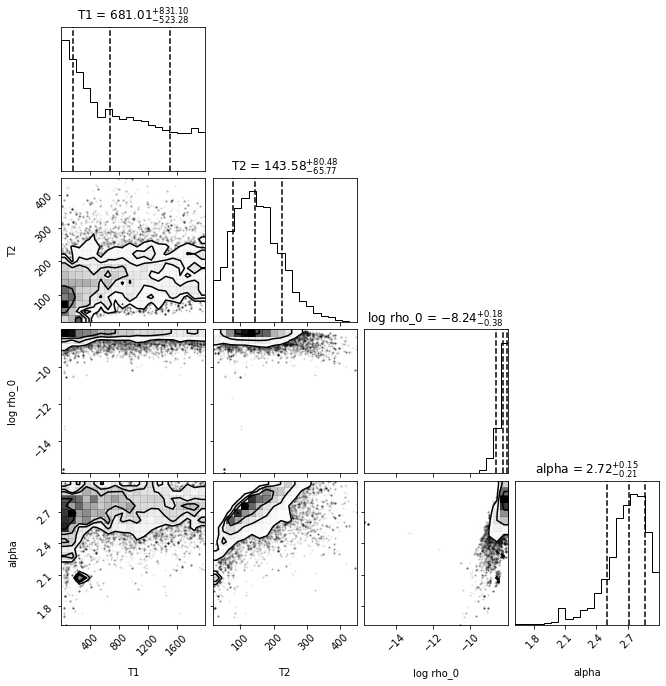

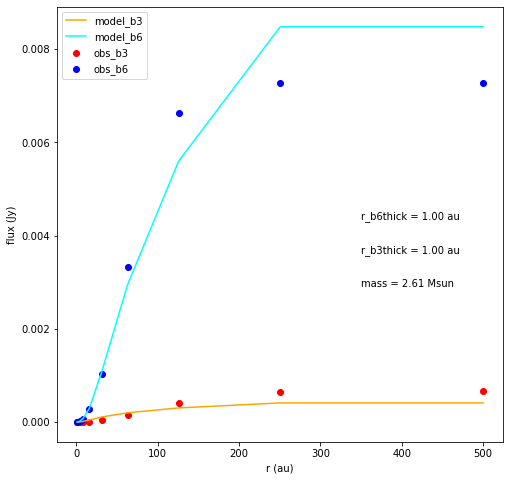

flux_apertures [7.16307751e-08 2.85007298e-07 1.13388309e-06 4.50926116e-06
 1.79038255e-05 7.06350815e-05 2.71761333e-04 9.49511736e-04
 2.38880670e-03 3.12427621e-03] [1.11640685e-05 4.44179885e-05 1.76681821e-04 7.02123474e-04
 2.77971656e-03 1.08422035e-02 3.99052325e-02 1.18882667e-01
 2.00874260e-01 2.08011600e-01]
348.32412637825206 227.2844652404475
spectral index 4.711042891346915
flux 0.0020729694756933177 0.12408639869796285
flux_apertures [5.81706707e-08 2.31435495e-07 9.20494461e-07 3.65659384e-06
 1.44545476e-05 5.60433073e-05 2.01604323e-04 5.56236960e-04
 8.21907830e-04 8.32207795e-04] [1.53576643e-06 6.10793745e-06 2.42584718e-05 9.58180435e-05
 3.70351376e-04 1.31661481e-03 3.49666338e-03 4.88968810e-03
 4.92548681e-03 4.92548683e-03]
199.15856870343785 94.29113521104178
spectral index 1.9952136937684346
flux 0.0006222344519150951 0.0035310445973215014
Running burn-in...
Running production...


In [ ]:
import time
w51e_b3_flux_fits = Table.read(w51e_b3_flux)
w51e_b6_flux_fits = Table.read(w51e_b6_flux)
w51n_b3_flux_fits = Table.read(w51n_b3_flux)
w51n_b6_flux_fits = Table.read(w51n_b6_flux)
w51e_b6_flux_conv_fits = Table.read(w51e_b6_conv_flux)
w51n_b6_flux_conv_fits = Table.read(w51n_b6_conv_flux)

w51e_b3_major = w51e_b3_flux_fits['deconvolved_major'].value* np.pi/180 * 5.41*1000*206265
w51e_b6_major = w51e_b6_flux_fits['deconvolved_major'].value* np.pi/180 * 5.41*1000*206265
w51n_b3_major = w51n_b3_flux_fits['deconvolved_major'].value* np.pi/180 * 5.1*1000*206265
w51n_b6_major = w51n_b6_flux_fits['deconvolved_major'].value* np.pi/180 * 5.1*1000*206265
w51e_b3_minor = w51e_b3_flux_fits['deconvolved_minor'].value* np.pi/180 * 5.41*1000*206265
w51e_b6_minor = w51e_b6_flux_fits['deconvolved_minor'].value* np.pi/180 * 5.41*1000*206265
w51n_b3_minor = w51n_b3_flux_fits['deconvolved_minor'].value* np.pi/180 * 5.1*1000*206265
w51n_b6_minor = w51n_b6_flux_fits['deconvolved_minor'].value* np.pi/180 * 5.1*1000*206265



w51e_b3_int_flux = w51e_b3_flux_fits['flux']
w51e_b6_int_flux = w51e_b6_flux_conv_fits['flux']
w51n_b3_int_flux = w51n_b3_flux_fits['flux']
w51n_b6_int_flux = w51n_b6_flux_conv_fits['flux']

w51e_b3_int_fluxerr = w51e_b3_flux_fits['flux_upperr'] - w51e_b3_flux_fits['flux_lowerr']
w51e_b6_int_fluxerr = w51e_b6_flux_conv_fits['flux_upperr'] - w51e_b6_flux_conv_fits['flux_lowerr']
w51n_b3_int_fluxerr = w51n_b3_flux_fits['flux_upperr'] - w51n_b3_flux_fits['flux_lowerr']
w51n_b6_int_fluxerr = w51n_b6_flux_conv_fits['flux_upperr'] - w51n_b6_flux_conv_fits['flux_lowerr']
rmax=500
num=10
rarr = np.logspace(0,np.log10(rmax),num=num)
labels = ['T1', 'T2', 'log rho_0','alpha']
freqb3=92982346121.91989*u.Hz
freqb6=226691598706.70853*u.Hz
kappa_b3 = kappa(freqb3)
kappa_b6 = kappa(freqb6)
au_to_cm = (1*u.au).to(u.cm)
dist = 5.41*u.kpc
r_0 = 1*u.au
for i in range(len(w51e_b3_int_flux)):
    if any((w51e_b3_int_flux[i]<0, w51e_b6_int_flux[i]<0,
            ~np.isfinite(w51e_b3_int_flux[i]), ~np.isfinite(w51e_b6_int_flux[i]), 
            w51e_b3_major[i]<=0, w51e_b6_major[i]<=0)):
        continue
    start=time.time()
    nll = lambda *args: -lnlike(*args)
    initial = np.array([80, 40, -12 ,2])
    ndim = len(initial)
    nwalkers=50
    niter=512
    
    p0 = [np.array(initial) + [30,10,1,0.1] * np.random.randn(ndim) for i in range(nwalkers)]

    
    flux_b3 = flux_gaussian_multiple_apertures(w51e_b3_int_flux[i],w51e_b3_major[i], w51e_b3_minor[i], rarr)
    flux_b6 = flux_gaussian_multiple_apertures(w51e_b6_int_flux[i],w51e_b6_major[i], w51e_b6_minor[i], rarr)
    print('flux_apertures', flux_b3, flux_b6)
    print(w51e_b3_major[i],w51e_b6_major[i])
    spectral_index = np.log(flux_b3[-1]/flux_b6[-1])/np.log(freqb3/freqb6)
    print('spectral index',spectral_index )
    print('flux', w51e_b3_int_flux[i], w51e_b6_int_flux[i])
    if any((spectral_index>4, spectral_index<1.7)):
        continue
    
    data = (flux_b3, flux_b6, w51e_b3_int_fluxerr[i], w51e_b6_int_fluxerr[i], rarr)

    sampler, pos, prob, state = main(p0,nwalkers,niter,ndim,lnprob,data)
    print('elapsed time, ',time.time()-start)

    samples = sampler.flatchain
    print(samples[np.argmax(sampler.flatlnprobability)])
    theta_max  = samples[np.argmax(sampler.flatlnprobability)]
    r_b3thick = r_0 * (1+(1-theta_max[3])/kappa_b3.value/(10**theta_max[2])/au_to_cm.value)**(1/(1-theta_max[3]))
    r_b6thick = r_0 * (1+(1-theta_max[3])/kappa_b6.value/(10**theta_max[2])/au_to_cm.value)**(1/(1-theta_max[3]))
    print('r_thick',r_b3thick,r_b6thick)
    mass = get_mass(10**theta_max[2], theta_max[3])
    print('mass', mass)
    
    f1,f2 = get_flux_aperture(theta_max, rarr, freqb3, freqb6, verbose=True )

    fig = corner.corner(samples,show_titles=True,labels=labels,plot_datapoints=True,quantiles=[0.16, 0.5, 0.84])
    
    fig = plt.figure(figsize=(8,8))
    model_b3, model_b6 = get_flux_aperture(theta_max, rarr, freqb3, freqb6, dist=dist )
    
    plt.plot(rarr, model_b3, c='orange', label='model_b3')
    plt.plot(rarr, model_b6, c='cyan', label='model_b6')
    plt.scatter(rarr, flux_b3, c='r', label='obs_b3')
    plt.scatter(rarr, flux_b6, c='b', label='obs_b6')
    plt.text(350, np.max(flux_b6)*0.6, 'r_b6thick = %3.2f'%r_b6thick.value+' au')
    plt.text(350, np.max(flux_b6)*0.5, 'r_b3thick = %3.2f'%r_b3thick.value+' au')
    plt.text(350, np.max(flux_b6)*0.4, 'mass = %3.2f'%mass.value+' Msun')

    plt.legend()
    plt.xlabel('r (au)')
    plt.ylabel('flux (Jy)')
    #plt.xscale('log')
    #plt.yscale('log')
    plt.show()
    plt.close()